In [42]:
# EDA steps
# 1. cheack .head(), .tail(), .describe()
# 2. check types of each column
# 3. remove the useless columns
# 4. drop duplicated rows
# 5. dropna()
# 6. detecting and excluding outliers (IQR score technique, box plot)
# 7. plot: bar, heatmap (find dep var), Scatterplots

# PETI8123 Lab 4: Exploratory Data Analysis (EDA)

## What is Exploratory Data Analysis?

This lab aims to introduce how to explore data with Python.

* Exploratory Data Analysis (or EDA) is the approach to understand the datasets by summarizing their main characteristics and plotting them visually.
* This step is very important especially when we first obtain the data.
* It often takes time to explore the data. Through the process of EDA, we can define problem statements or definitions on our dataset which is very important for researching the data.
* Plotting in EDA consists of histograms, box plot, scatter plot and many more. We introduce some of these in this lab.

## How to Perform Exploratory Data Analysis?

* This is one such question that everyone is keen on knowing the answer.
* However, the answer is that it depends on the dataset that you are working on. There is no one method or common methods for performing EDA, whereas in this lab you can understand some common methods and plots that would be used in the EDA process.

---

## 1. Importing the Required Modules for EDA

Below we import necessary modules and run some code to configure the modules.

In [1]:
# Import NumPy library as 'np' for numerical operations
import numpy as np

# Import pandas library as 'pd' for data manipulation
import pandas as pd

# Import Seaborn library for data visualization
import seaborn as sns

# Import Matplotlib's pyplot module as 'plt' for creating plots
import matplotlib.pyplot as plt

# Enable inline plotting within Jupyter Notebook
%matplotlib inline

# Set Seaborn to use color codes for plots
sns.set(color_codes=True)

## 2. Reading and Peeking at the Data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Read the CSV file into a DataFrame
path = '/content/gdrive/MyDrive/Innovations in Technology and Education/'
df = pd.read_csv(path + "lab4_data.csv")

# Display the top 5 rows of the DataFrame
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Understand Your Data

Now you need to understand the meaning of each column:

* Make: Brand Name
* Engine HP: Engine HorsePower
* Transmission Type: Manual or Automatic
* Market Category: The targetted cohort of buyers of a model
* Highway MPG: Miles Per Gallon on Highway
* City MPG: Miles Per Gallon in City
* MSRP: Manufacturer's Suggested Retail Price

Apparently, there are often many data columns but we only use data that can fit with our analytical purposes. We will remove the unused columns later.

In [6]:
# Also, you can display the last 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


We normally use ``df.head()``, ``df.tail()`` and ``df.describe()`` to get an overview of the data that we don't know about.

Below is the result of ``df.describe()``.

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Checking Data Types

Here we check for the data types in the dataset because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data for other numerical operations. Here, we show ``df.dtypes`` to check the data types of every column.

In our case, the data is already in integer format so nothing to worry.

In [8]:
# Check the data types of columns in the DataFrame
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
Highway MPG            int64
City MPG               int64
Popularity             int64
MSRP                   int64
dtype: object

## 3. Dropping and Renaming Columns

Dropping columns is a step that certainly needed in every EDA because sometimes there would be many columns that we never use. In this case, the columns such as ``Engine Fuel Type, Market Category, Vehicle Style, Popularity, Number of Doors, Vehicle Size`` doesn't make any sense, so these are dropped for this instance.

In [ ]:
# Drop the specified columns from the DataFrame
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity',
              'Number of Doors', 'Vehicle Size'], axis=1)

# Display the top 5 rows of the modified DataFrame
df.head(5)

In this instance, most of the column names are confusing to read, so we need to tweak their column names. This is a good practice as it improves the readability of the dataset.

In [9]:
# Rename the columns in the DataFrame to shorter, more convenient names
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission", "Driven Wheels": "Drive Mode",
                        "Highway MPG": "MPG-H", "City MPG": "MPG-C", "MSRP": "Price"})

# Display the top 5 rows of the DataFrame with renamed columns
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 4. Dropping Duplicate Rows

This is often a handy thing to do because a huge data set as in this case contains more than 10,000 rows, and often it has some duplicate data which might be disturbing. Therefore, here we remove all the duplicate rows from the dataset. In this case, prior to removing, we have 11,914 rows of data and only 10,925 rows after removing. This means thatwe have removed 989 rows of duplicate data.

In [10]:
# Get the shape (number of rows and columns) of the DataFrame
df.shape

(11914, 16)

In [11]:
# Identify and store duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]

# Print the number of duplicate rows and their shape
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)


In [14]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Display the top 5 rows of the DataFrame after removing duplicates
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
# Count the number of non-null values in each column of the DataFrame
df.count()

Make                11199
Model               11199
Year                11199
Engine Fuel Type    11196
HP                  11130
Cylinders           11169
Transmission        11199
Drive Mode          11199
Number of Doors     11193
Market Category      7823
Vehicle Size        11199
Vehicle Style       11199
MPG-H               11199
MPG-C               11199
Popularity          11199
Price               11199
dtype: int64

## 5. Dropping Missing Values

In [16]:
# Check and print the number of rows with missing (null) values in each column of the DataFrame
df.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3376
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64

In the above step, we can see that there are some missing (also known as null or N/A) values in both ``Cylinders`` and ``Horsepower (HP)`` columns.

In [17]:
# Remove rows with missing (null) values from the DataFrame
df = df.dropna()

# Count the number of non-null values in each column of the modified DataFrame
df.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Size        7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
Price               7735
dtype: int64

Now we have removed all the rows which contain the missing values.

In [18]:
# After dropping the values
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


## 6. Detecting and Excluding Outliers

* An **outlier** is a point or set of points that are different from other points. Sometimes they can be very high or very low.
* It's often a good idea to detect and remove the outliers, because outliers are one of the primary reasons for resulting in a less accurate model.
* The outlier detection and removing that we are going to perform is called IQR score technique.
* Often outliers can be seen with a visualization called box plot. Shown below are the box plots of ``Price``, ``Cylinders`` and ``Horsepower (HP)``. Here in all the plots, you can find some points are outside the boxes.

<Axes: xlabel='Price'>

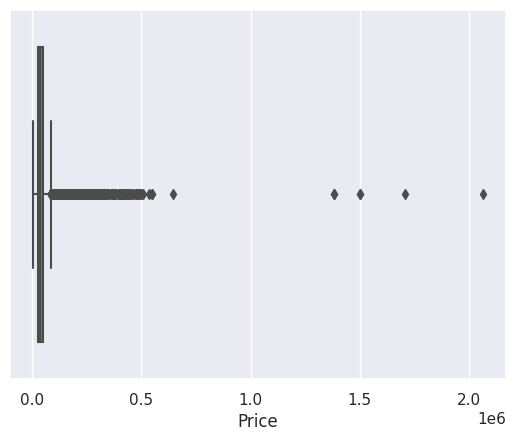

In [19]:
# Create a box plot to visualize the distribution of 'Price' column
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

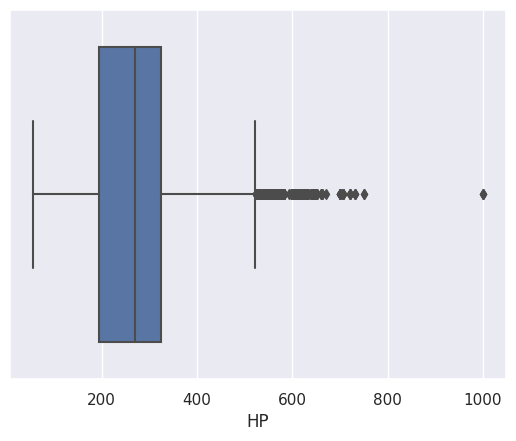

In [20]:
# Create a box plot to visualize the distribution of 'HP' (Horsepower) column
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

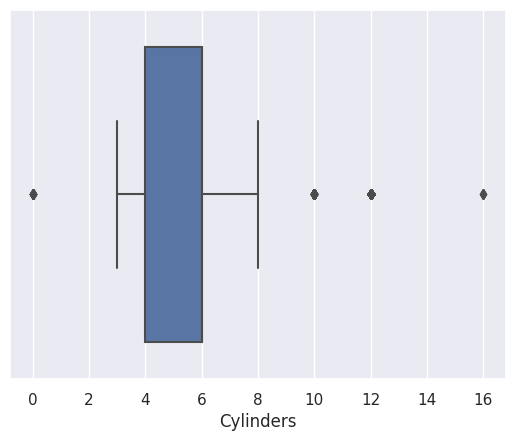

In [21]:
# Create a box plot to visualize the distribution of the 'Cylinders' column
sns.boxplot(x=df['Cylinders'])

In [22]:
# Exclude non-numeric columns and calculate the IQR for each column
numeric_columns = df.select_dtypes(include=[np.number])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Print the calculated IQR for each numeric column
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


The following figure shows the idea of IQR.

![IQR](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)

Below we write a filter to obtain rows **NOT** in the IQR range:

In [23]:
# Apply the outlier removal condition to numeric columns
condition = ~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the DataFrame based on the condition
# Now df only contains records without the outliners
df = df[condition]

# Display the new shape (number of rows and columns) of the DataFrame
df.shape

(5622, 16)

As seen above there are around 1,600 rows that are outliers and they are excluded from the dataset.

## 7. Plotting

### Histogram

Histogram refers to the frequency of occurrence of a variable. In this case, there are mainly 10 different car manufacturing companies in the dataset, and it is often important to know who has produced the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by different companies.

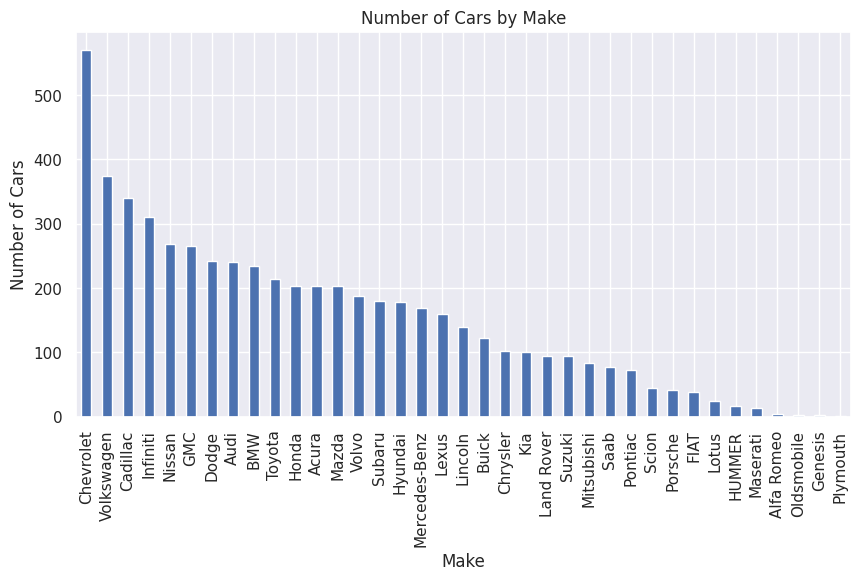

In [24]:
# Create a bar plot to visualize the number of cars by make (top 40 makes)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

# Set the title of the plot
plt.title("Number of Cars by Make")

# Set the label for the y-axis
plt.ylabel('Number of Cars')

# Set the label for the x-axis
plt.xlabel('Make')

plt.show()

### Heat Maps

Heat maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the correlations between the features can be done using heat maps. In the below heat map we know that the ``Price`` feature depends mainly on the ``HP``, ``Year``, and a little bit of ``Cylinders``.

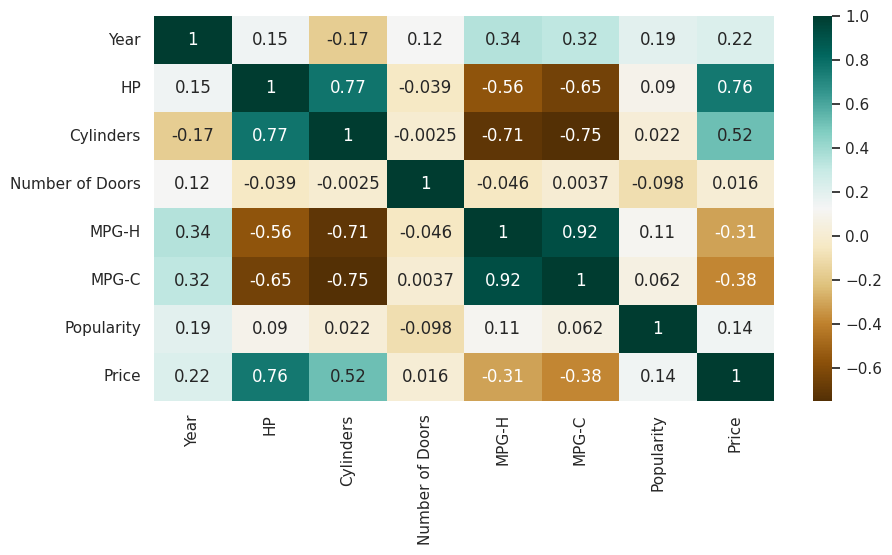

In [25]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
c = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="BrBG", annot=True)

# Display the plot
plt.show()

### ❓ Question

Can you identify other variables that depend on each other?

---


### Scatterplots

We generally use scatter plots to find the correlation between **two variables**. Here the scatter plots are plotted between ``Horsepower`` and ``Price`` and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

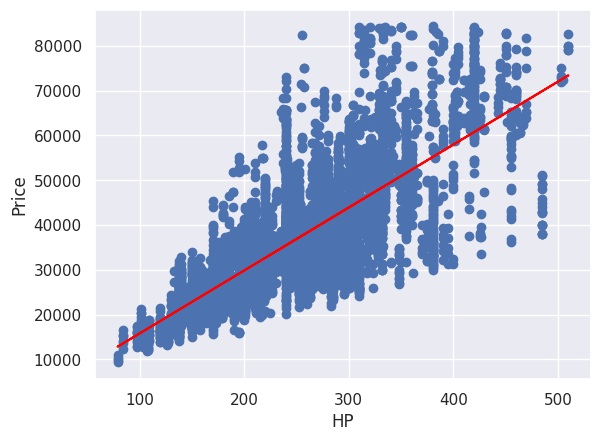

In [26]:
# Scatter plot 'HP' on the x-axis and 'Price' on the y-axis
x = df["HP"]
y = df["Price"]
plt.scatter(x, y)

# Set the label for the x-axis
plt.xlabel('HP')

# Set the label for the y-axis
plt.ylabel('Price')

# Calculate equation for the trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(x, p(x), color='red')

# Display the plot
plt.show()

Hence the above are some of the steps involved in EDA. These are some general steps that you should follow in order to understand your data. There are more than enough ideas as to how to perform a good EDA given any data sets, and I suggest you to search online for more approaches for better peeking at your data.

---

## ⚠️ Exercises

Please open a new DataFrame ``df_new`` from ``lab4_data.csv``, and use this ``df_new`` for these exercises.

In [28]:
df_new = pd.read_csv(path + "lab4_data.csv")

df_new.shape

(11914, 16)

**1.** Visualize the correlation trend between ``Popularity`` and ``MSRP``. What's your conclusion?

First, we obtain the two columns:

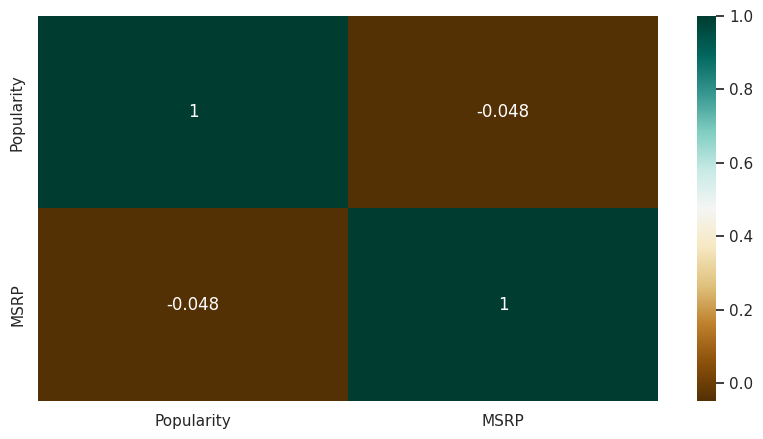

In [32]:
# Write your code here using the ``columns`` variable
columns = df_new[["Popularity", "MSRP"]]
correlation = columns.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, cmap='BrBG', annot=True)
plt.show()
# conclusion: almost no correlation

**2.** Create a histogram from column ``Vehicle Size``.

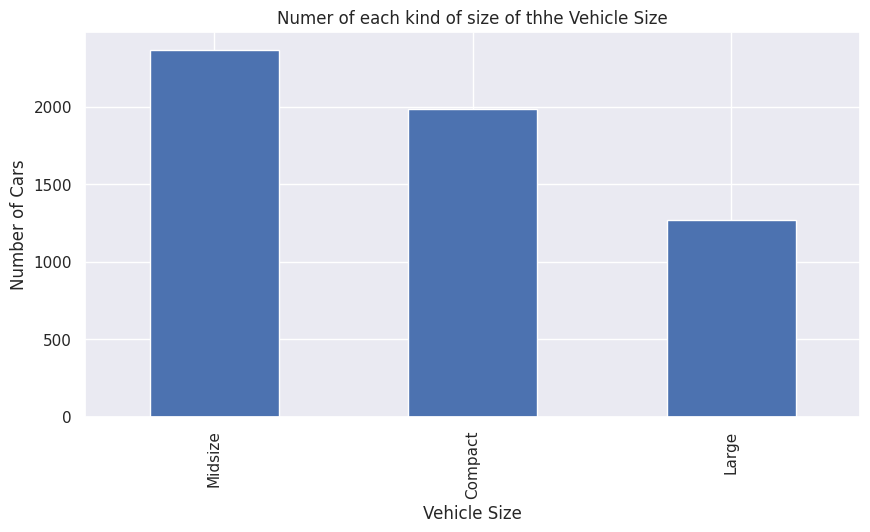

In [34]:
df['Vehicle Size'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Numer of each kind of size of thhe Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Number of Cars')
plt.show()

**3.** Plot the outliers of the ``City MPG``?

<Axes: xlabel='City MPG'>

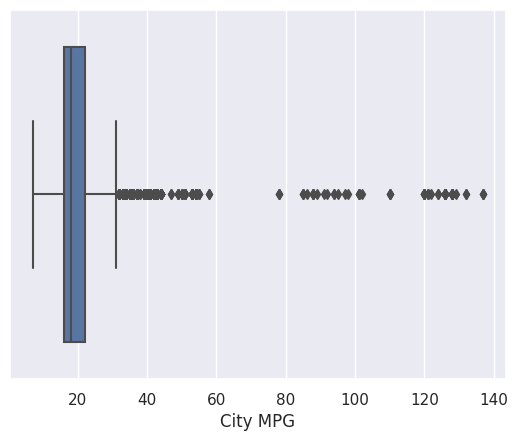

In [36]:
sns.boxplot(x=df_new['City MPG'])

**4.** Try to plot the scatterplot between ``Highway MPG`` and ``MSRP``. What do you think about the result?

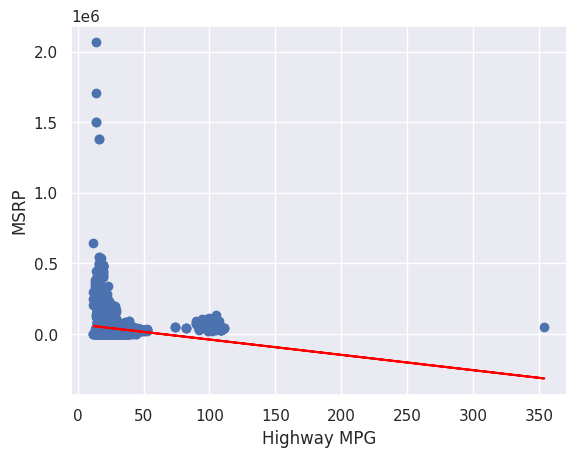

In [41]:
x = df_new['Highway MPG']
y = df_new['MSRP']
plt.scatter(x, y)

plt.xlabel('Highway MPG')
plt.ylabel('MSRP')

# trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color='red')
plt.show()